In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# scratch-1

In [7]:
# loading the data from csv file to pandas dataframe
diabetes_data = pd.read_csv('data/SVM/diabetes.csv')
features = diabetes_data.drop(columns='Outcome', axis=1)
target = diabetes_data['Outcome']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state = 2)


In [37]:
# print(type(Y_train))
# to_numpy(Y_test)
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()


In [17]:
Y_train

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

## **For Each Data Point:**

### **Compute the Condition:**

$$
y_i (w \cdot x_i - b) \geq 1
$$

- **If True**: The data point is correctly classified with a sufficient margin.
- **If False**: The data point is either misclassified or within the margin.

### **Compute Gradients ($d_w$ and $d_b$):**

- **Condition True**:
  - $$ d_w = 2\lambda w $$
  - $$ d_b = 0 $$
  - Only the regularization term influences the update.

- **Condition False**:
  - $$ d_w = 2\lambda w - y_i x_i $$
  - $$ d_b = y_i $$
  - Both regularization and hinge loss terms influence the update.

### **Update Weights and Bias:**

- $$ w = w - \alpha \times d_w $$
- $$ b = b - \alpha \times d_b $$
- **Learning Rate ($\alpha$)**: Determines the step size for each update.

## **Hinge Loss Calculation (`hinge_loss` Method):**

### **Compute Distances:**

$$
\text{distances} = 1 - y_i (w \cdot x_i - b)
$$

### **Apply Hinge Loss:**

$$
\text{hinge\_loss} = \max(0, \text{distances})
$$

### **Total Loss:**

$$
\text{Total Loss} = \text{average hinge loss} + \lambda \| w \|^2
$$

**Purpose**: Provides a measure of how well the model is performing. Monitoring the hinge loss helps in understanding the convergence of the model during training.

## **Prediction (`predict` Method):**

### **Compute Decision Function:**

$$
\text{output} = w \cdot x - b
$$

### **Assign Labels:**

$$
\hat{y} = \begin{cases} 
1 & \text{if } \text{output} \geq 0 \\
0 & \text{otherwise} 
\end{cases}
$$

**Note**: The labels are converted back to 0 and 1 for prediction purposes.


In [58]:
import numpy as np

class SVM_classifier:

    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = np.where(Y <= 0, -1, 1)  # Convert labels to -1 or 1

        for i in range(self.no_of_iterations):
            self.update_weights()

            # Calculate and print the hinge loss at each iteration
            loss = self.hinge_loss(self.X, self.Y)
            print(f"Iteration {i+1}/{self.no_of_iterations}, Hinge Loss: {loss:.4f}")

    def update_weights(self):
        for index, x_i in enumerate(self.X):

            # Condition Check determines if the data point is correctly classified with the desired margin
            condition = self.Y[index] * (np.dot(x_i, self.w) - self.b) >= 1

            if condition:
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, self.Y[index])
                db = self.Y[index]

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def hinge_loss(self, X, Y):
        distances = 1 - Y * (np.dot(X, self.w) - self.b)
        distances = np.maximum(0, distances)  # hinge loss is max(0, 1 - y * (w * x - b))
        hinge_loss_value = np.mean(distances) + self.lambda_parameter * np.sum(self.w ** 2)
        return hinge_loss_value

    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        y_hat = np.where(output < 0, 0, 1)
        return y_hat
    
    def plot_decision_boundary(self, X, Y):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', alpha=0.7)

        # Define the hyperplane: w1*x1 + w2*x2 - b = 0
        x1 = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1, 100)
        x2 = (self.w[0] * x1 - self.b) / self.w[1]
        
        plt.plot(x1, x2, 'k-', label='Decision Boundary')

        # Plot margins
        margin = 1 / np.linalg.norm(self.w)
        x2_margin1 = x2 + np.sqrt(1 + (self.w[0]/self.w[1])**2) * margin
        x2_margin2 = x2 - np.sqrt(1 + (self.w[0]/self.w[1])**2) * margin
        plt.plot(x1, x2_margin1, 'k--', label='Margin')
        plt.plot(x1, x2_margin2, 'k--')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

    

    # def plot_decision_boundary_pca(self, X, Y):
    #     pca = PCA(n_components=2)
    #     X_reduced = pca.fit_transform(X)
        
    #     plt.figure(figsize=(8, 6))
    #     plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y, cmap='bwr', alpha=0.7)
        
    #     # Define the hyperplane in PCA-reduced space
    #     x1 = np.linspace(np.min(X_reduced[:, 0])-1, np.max(X_reduced[:, 0])+1, 100)
    #     x2 = (self.w[0] * x1 - self.b) / self.w[1]
        
    #     plt.plot(x1, x2, 'k-', label='Decision Boundary')
        
    #     # Plot margins
    #     margin = 1 / np.linalg.norm(self.w)
    #     x2_margin1 = x2 + np.sqrt(1 + (self.w[0]/self.w[1])**2) * margin
    #     x2_margin2 = x2 - np.sqrt(1 + (self.w[0]/self.w[1])**2) * margin
    #     plt.plot(x1, x2_margin1, 'k--', label='Margin')
    #     plt.plot(x1, x2_margin2, 'k--')

    #     plt.xlabel('Principal Component 1')
    #     plt.ylabel('Principal Component 2')
    #     plt.legend()
    #     plt.show()



In [59]:
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=10, lambda_parameter=0.01)

classifier.fit(X_train, Y_train)
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
training_data_accuracy

Iteration 1/10, Hinge Loss: 0.6986
Iteration 2/10, Hinge Loss: 0.6001
Iteration 3/10, Hinge Loss: 0.5682
Iteration 4/10, Hinge Loss: 0.5515
Iteration 5/10, Hinge Loss: 0.5428
Iteration 6/10, Hinge Loss: 0.5365
Iteration 7/10, Hinge Loss: 0.5324
Iteration 8/10, Hinge Loss: 0.5299
Iteration 9/10, Hinge Loss: 0.5283
Iteration 10/10, Hinge Loss: 0.5270


0.7719869706840391

In [60]:
# accuracy on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
test_data_accuracy

0.7662337662337663

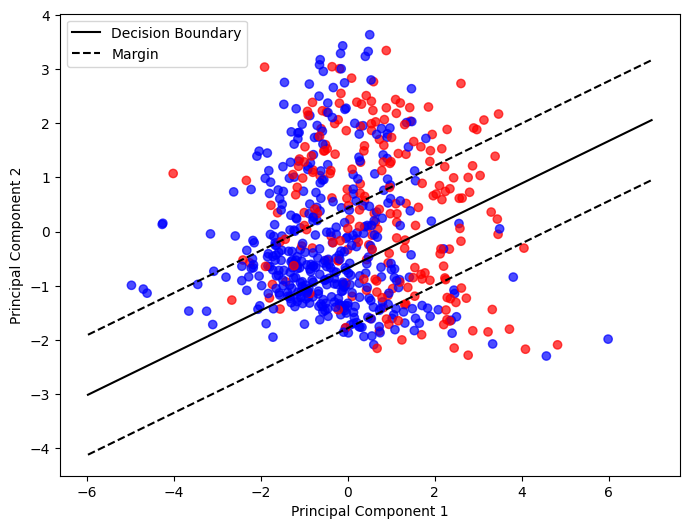

In [62]:
# Assuming svm is your trained SVM_classifier instance
classifier.plot_decision_boundary_pca(X_train, Y_train)
# classifier.plot_decision_boundary(X_train, Y_train)


In [66]:
# from sklearn import datasets
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# # from svm import SVM

# # Creating dataset
# X, y = datasets.make_blobs(

#         n_samples = 100, # Number of samples
#         n_features = 2, # Features
#         centers = 2,
#         cluster_std = 1,
#         random_state=40
#     )

# # Classes 1 and -1
# y = np.where(y == 0, -1, 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# print(X_train.shape)
# print(y_train.shape)
# type(y_train)

svm = SVM()
w, b, losses = svm.fit(X_train, Y_train)
prediction = svm.predict(X_test)
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, Y_test))
print("w, b:", [w, b])


Loss: 1.0000000038423387
Prediction: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 0.2922077922077922
w, b: [array([[ 8.70504930e-05,  9.12105684e-05, -4.10998963e-05,
         1.88501133e-06, -5.22089253e-05,  9.40720649e-05,
         3.00003915e-05,  6.56184708e-05]]), 1.180999999999997]


In [56]:
# losses

# sklearn

In [65]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

clf = make_pipeline(
                    LinearSVC(random_state=0, tol=1e-5))

clf.fit(X_train, Y_train)


Pipeline(steps=[('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [66]:
pred = clf.predict(X_test)
print(clf.score(X_test, Y_test))


0.7662337662337663
